In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [23]:
# Load dataset
url = "ndtv_data_final.csv"

df = pd.read_csv(url)


In [24]:
# convert Roupie to USD
df['Price'] = df['Price'] * 0.012

# suppression colonne inutile
df = df.drop(['Unnamed: 0','Name'], axis=1)

# understanding the dataset
df.head().T

,0,1,2,3,4
Brand,OnePlus,Realme,Apple,Apple,LG
Model,7T Pro McLaren Edition,X2 Pro,iPhone 11 Pro Max,iPhone 11,G8X ThinQ
Battery capacity (mAh),4085,4000,3969,3110,4000
Screen size (inches),6.67,6.5,6.5,6.1,6.4
Touchscreen,Yes,Yes,Yes,Yes,Yes
Resolution x,1440,1080,1242,828,1080
Resolution y,3120,2400,2688,1792,2340
Processor,8,8,6,6,8
RAM (MB),12000,6000,4000,4000,6000
Internal storage (GB),256.0,64.0,64.0,64.0,128.0


In [25]:
df.dtypes

Brand                      object
Model                      object
Battery capacity (mAh)      int64
Screen size (inches)      float64
Touchscreen                object
Resolution x                int64
Resolution y                int64
Processor                   int64
RAM (MB)                    int64
Internal storage (GB)     float64
Rear camera               float64
Front camera              float64
Operating system           object
Wi-Fi                      object
Bluetooth                  object
GPS                        object
Number of SIMs              int64
3G                         object
4G/ LTE                    object
Price                     float64
dtype: object

In [26]:
# checking NaN values
df.isnull().sum()

Brand                     0
Model                     0
Battery capacity (mAh)    0
Screen size (inches)      0
Touchscreen               0
Resolution x              0
Resolution y              0
Processor                 0
RAM (MB)                  0
Internal storage (GB)     0
Rear camera               0
Front camera              0
Operating system          0
Wi-Fi                     0
Bluetooth                 0
GPS                       0
Number of SIMs            0
3G                        0
4G/ LTE                   0
Price                     0
dtype: int64

EDA

In [27]:
# categorical features
categorical_features = df.select_dtypes(include=['object']).columns
print("Categorical features:", categorical_features)

# numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical features:", numerical_features)


Categorical features: Index(['Brand', 'Model', 'Touchscreen', 'Operating system', 'Wi-Fi',
       'Bluetooth', 'GPS', '3G', '4G/ LTE'],
      dtype='object')
Numerical features: Index(['Battery capacity (mAh)', 'Screen size (inches)', 'Resolution x',
       'Resolution y', 'Processor', 'RAM (MB)', 'Internal storage (GB)',
       'Rear camera', 'Front camera', 'Number of SIMs', 'Price'],
      dtype='object')


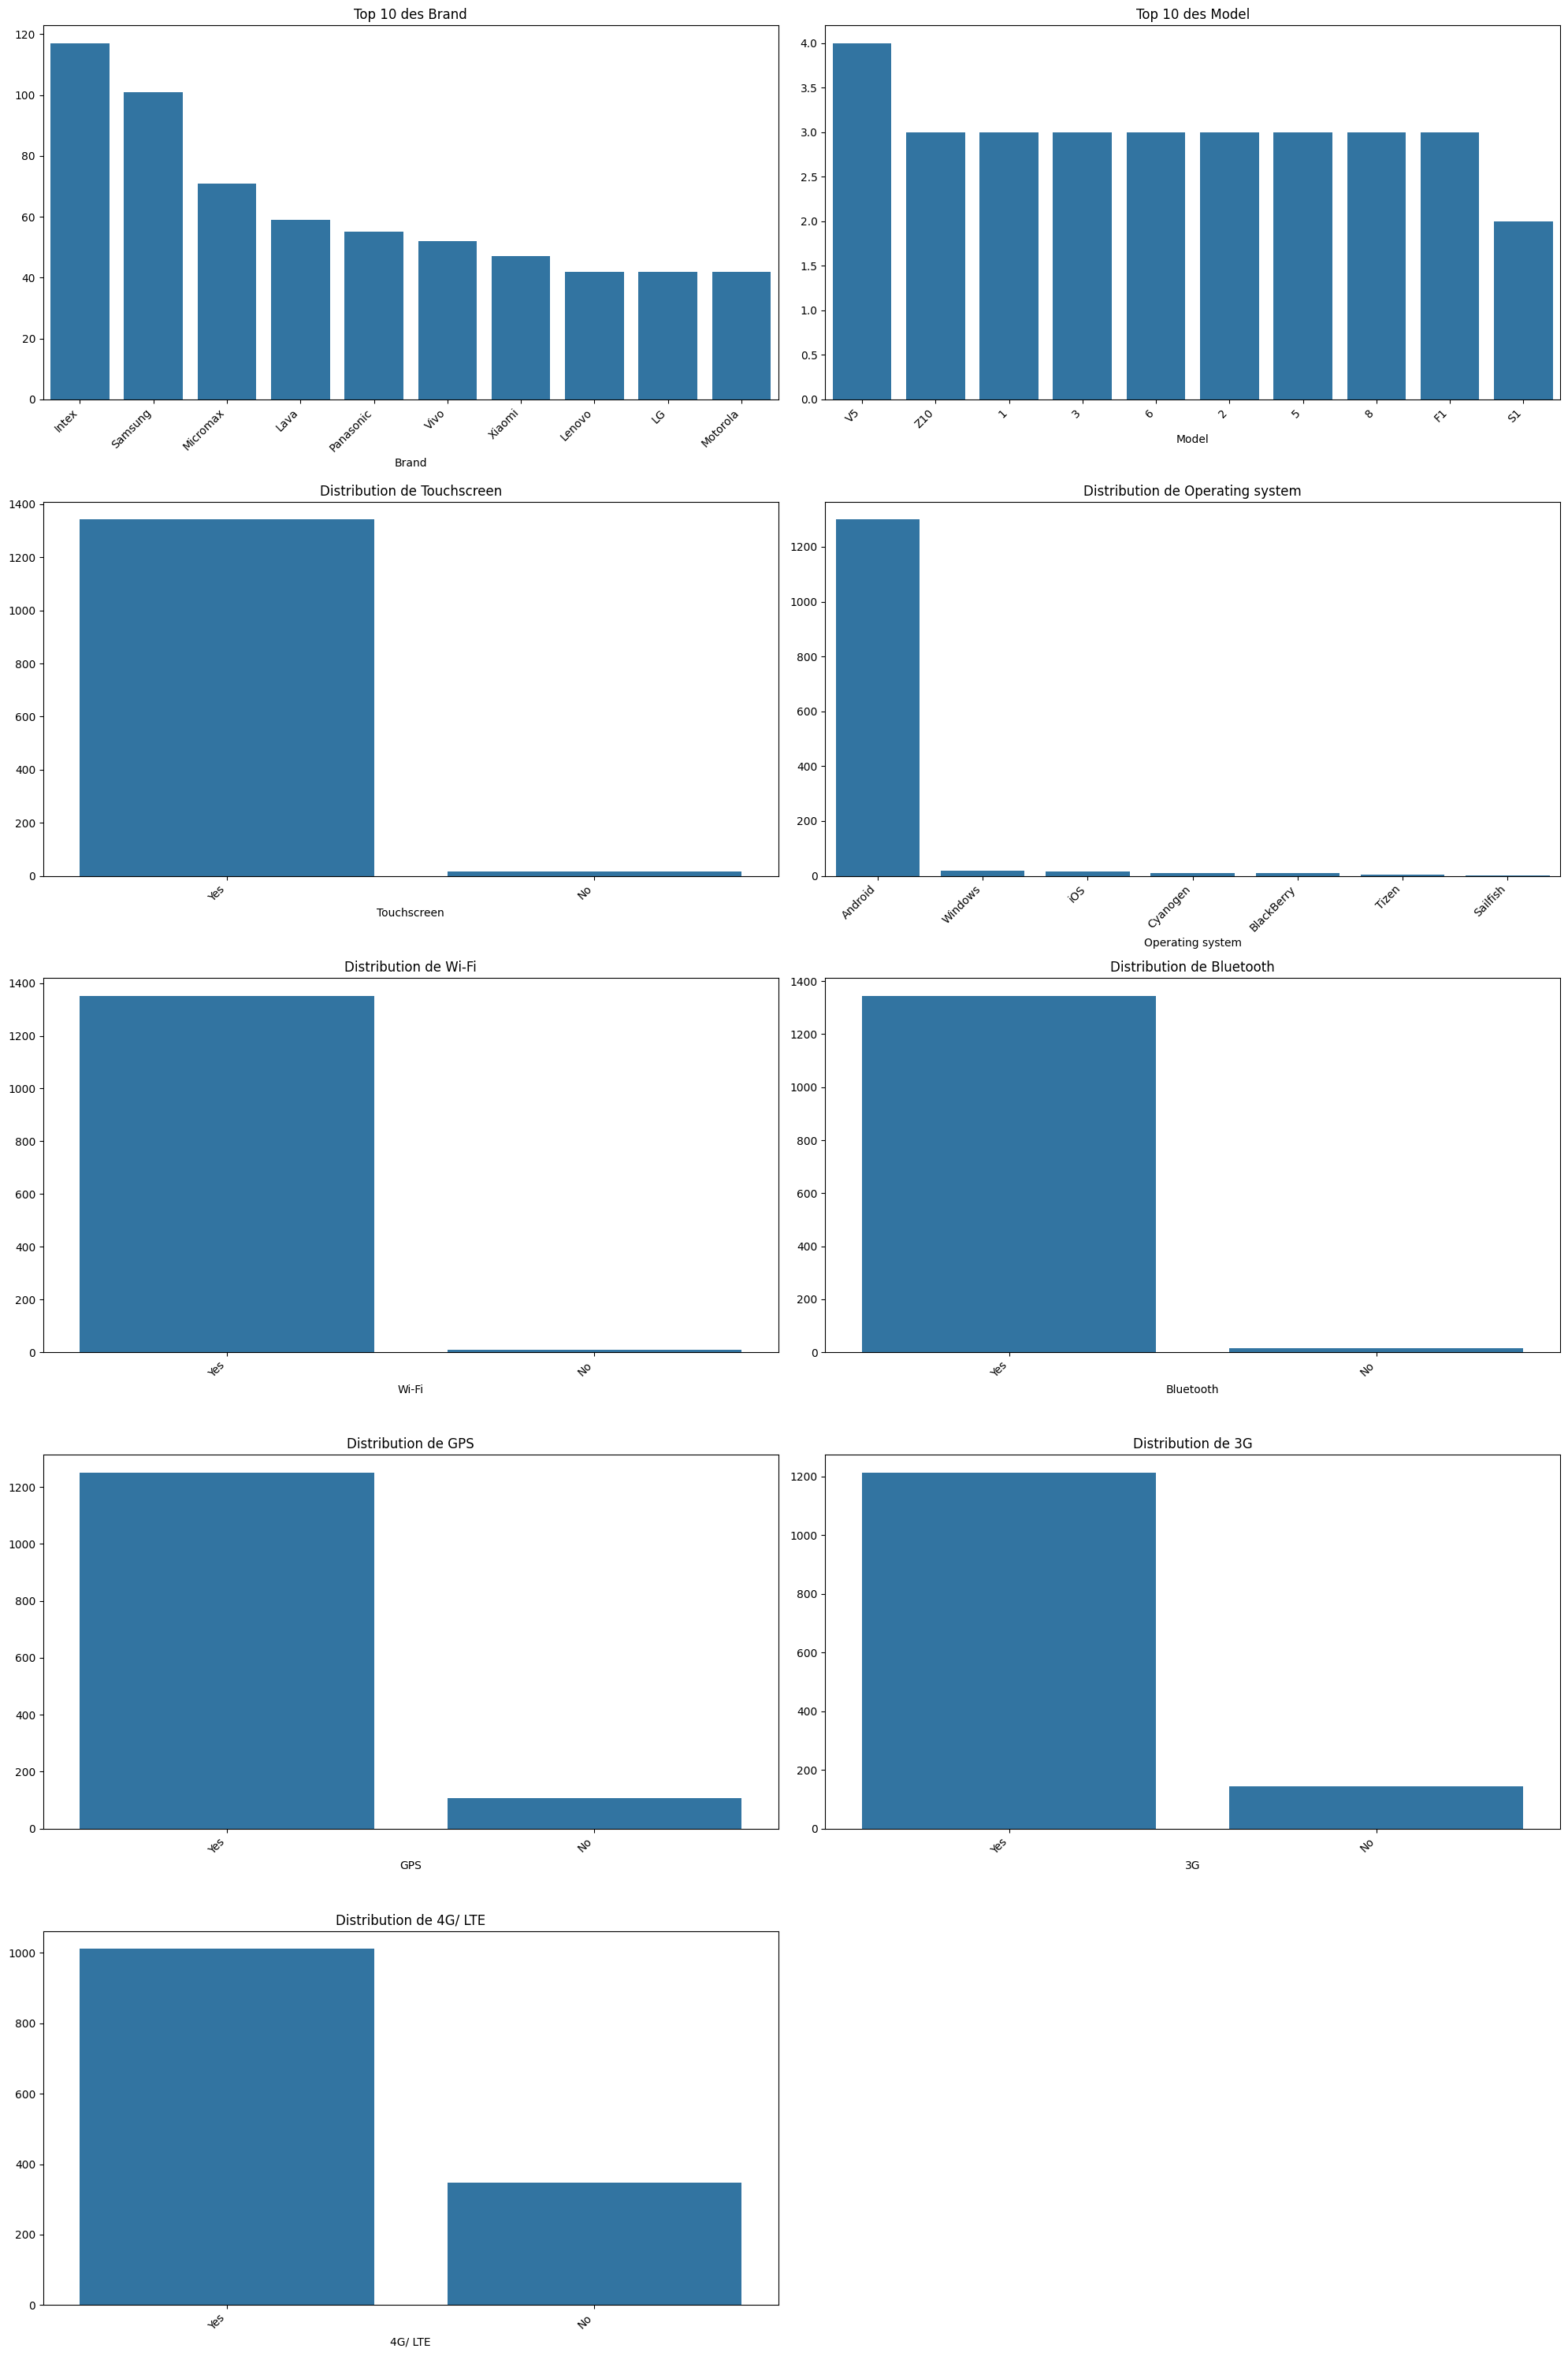

In [28]:
# Créer une figure avec plusieurs sous-graphiques
plt.figure(figsize=(20, 30))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(5, 2, i)
    
    # Afficher le nombre de catégories uniques
    value_counts = df[feature].value_counts()
    
    # Si le nombre de catégories est trop grand, on affiche uniquement les 10 plus fréquentes
    if len(value_counts) > 10:
        value_counts = value_counts.nlargest(10)
        plt.title(f'Top 10 des {feature}')
    else:
        plt.title(f'Distribution de {feature}')
    
    # Créer le graphique à barres
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

plt.show()

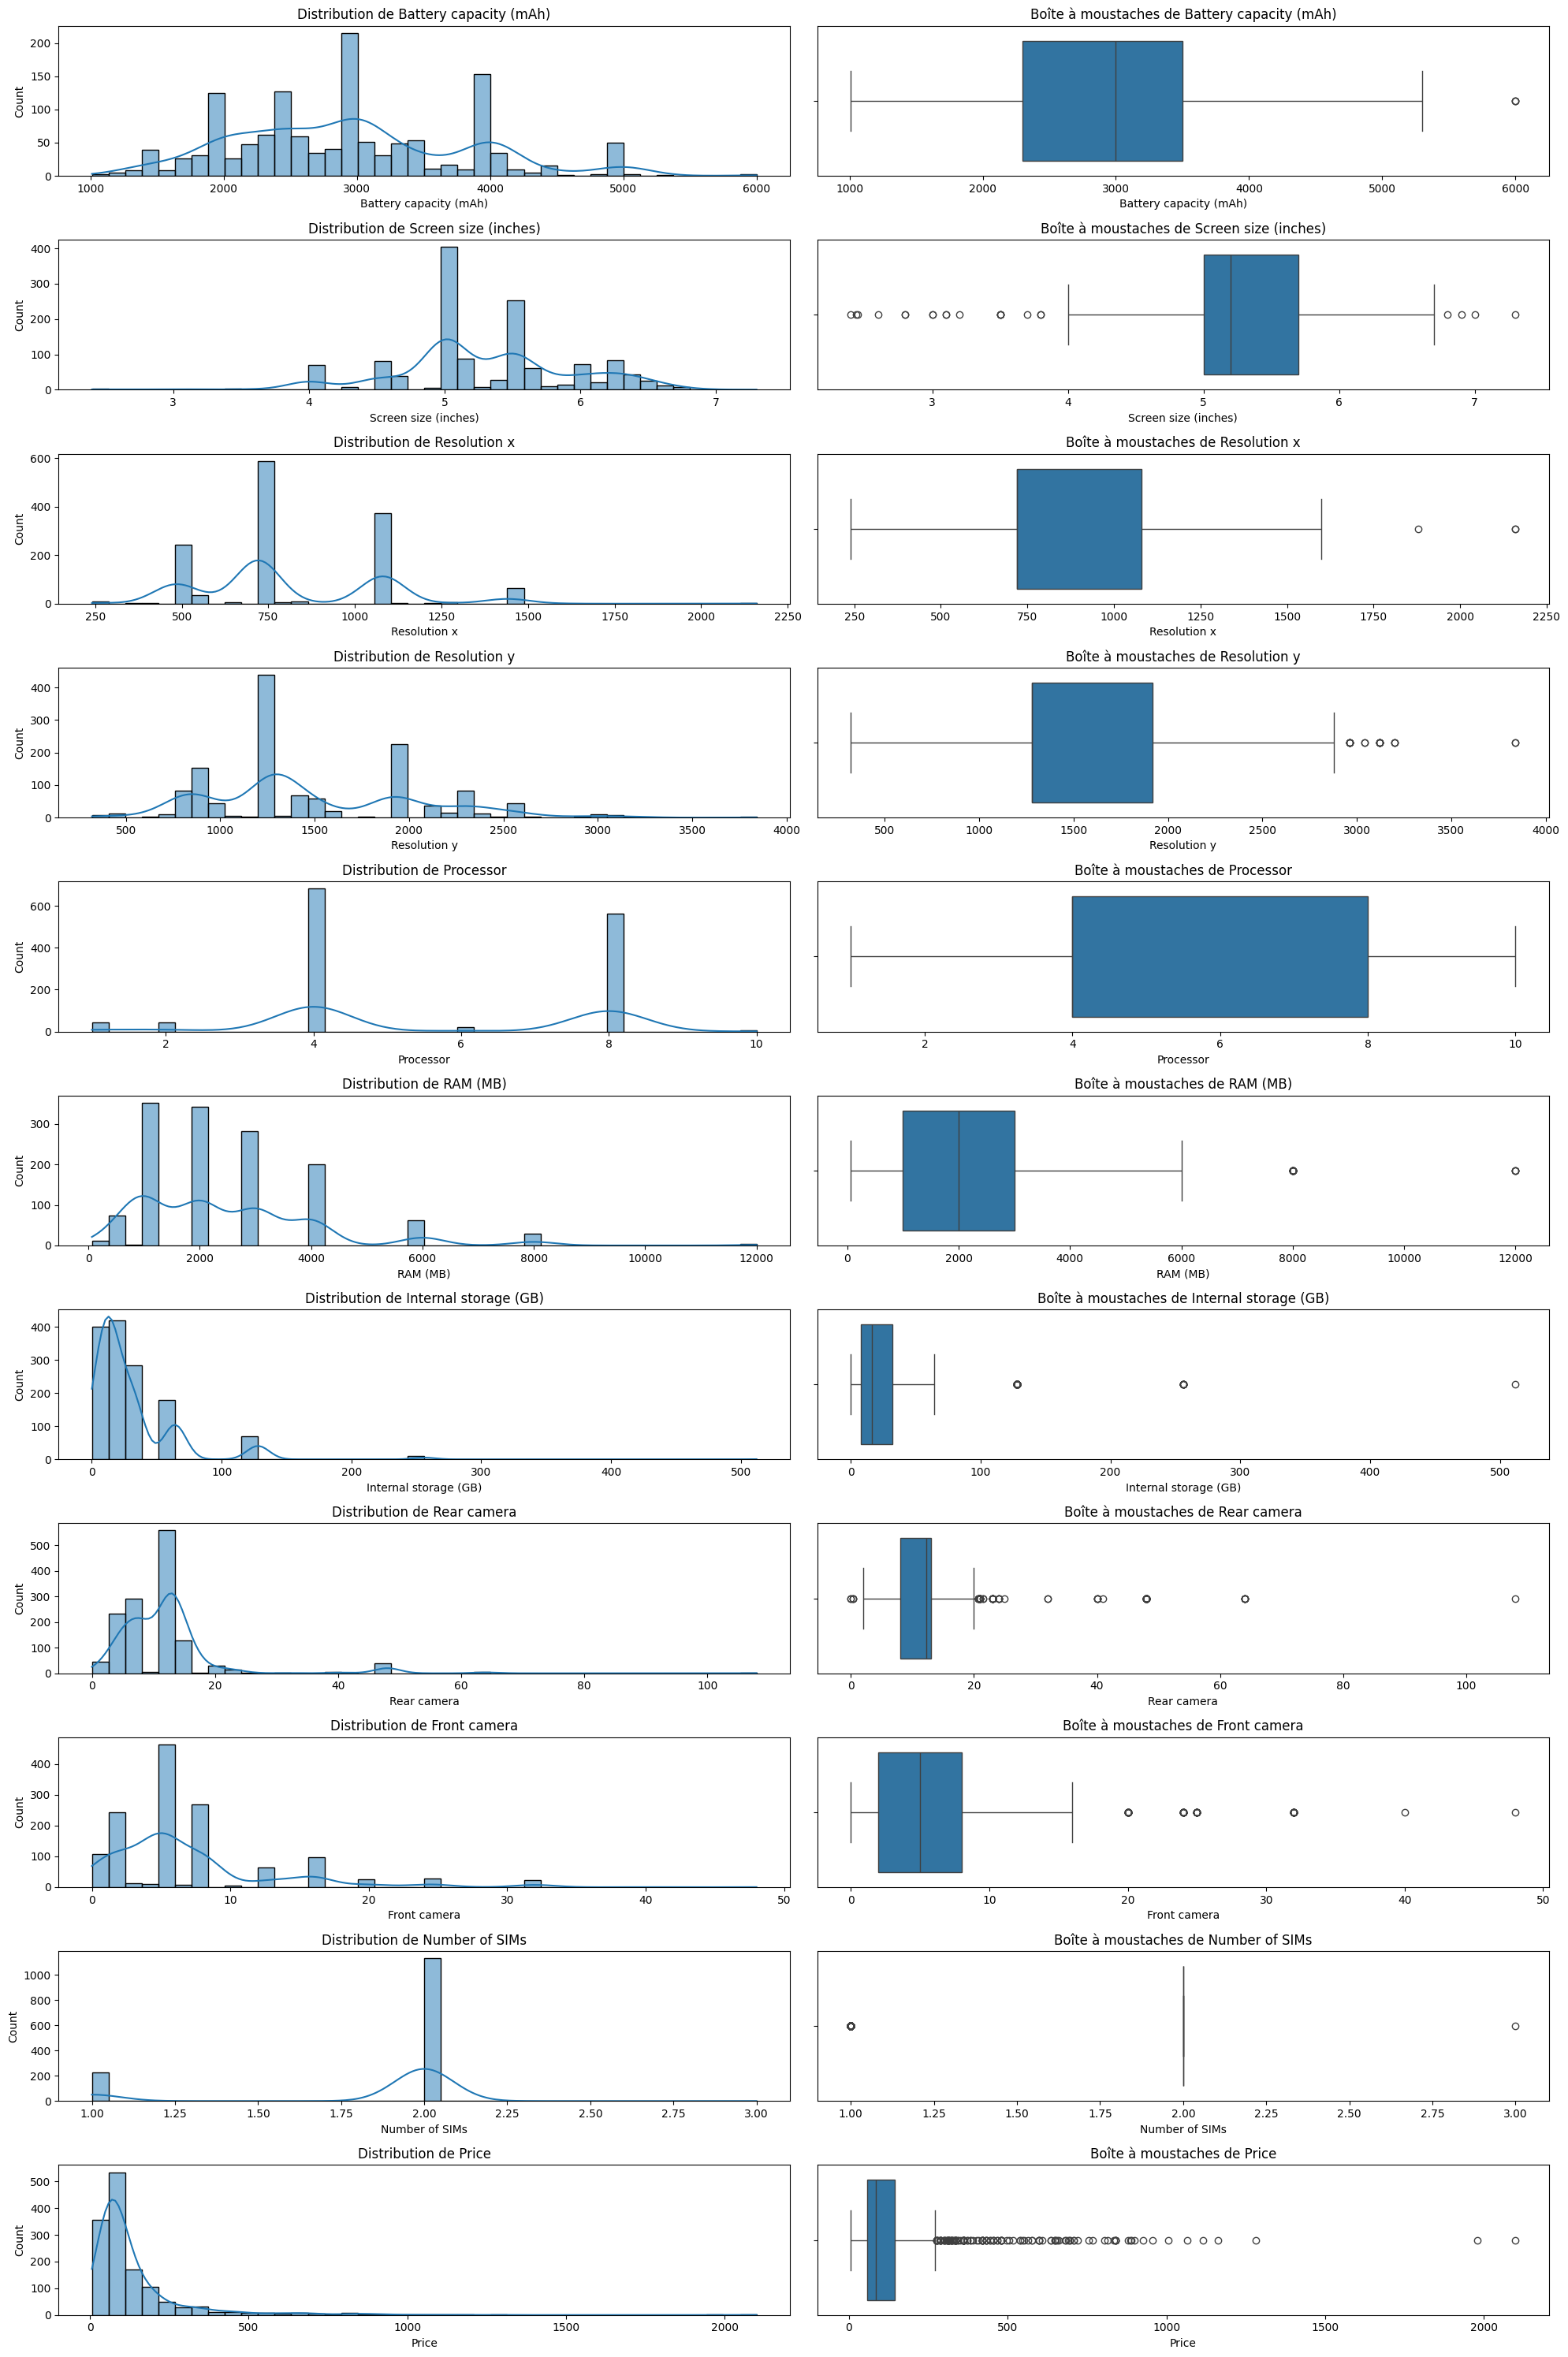

Statistiques descriptives :
       Battery capacity (mAh)  Screen size (inches)  Resolution x  \
count             1359.000000           1359.000000   1359.000000   
mean              2938.489330              5.291310    811.543046   
std                873.514133              0.671357    270.707271   
min               1010.000000              2.400000    240.000000   
25%               2300.000000              5.000000    720.000000   
50%               3000.000000              5.200000    720.000000   
75%               3500.000000              5.700000   1080.000000   
max               6000.000000              7.300000   2160.000000   

       Resolution y    Processor      RAM (MB)  Internal storage (GB)  \
count   1359.000000  1359.000000   1359.000000            1359.000000   
mean    1490.777778     5.551141   2488.777778              30.654864   
std      557.780120     2.196562   1664.440386              36.950241   
min      320.000000     1.000000     64.000000            

In [30]:
# Configuration de la figure
plt.figure(figsize=(20, 30))

# Création des sous-graphiques
for i, feature in enumerate(numerical_features, 1):
    # Histogramme
    plt.subplot(len(numerical_features), 2, 2*i-1)
    sns.histplot(df[feature], kde=True, bins=40)
    plt.title(f'Distribution de {feature}')
    
    # Boîte à moustaches
    plt.subplot(len(numerical_features), 2, 2*i)
    sns.boxplot(x=df[feature])
    plt.title(f'Boîte à moustaches de {feature}')

plt.tight_layout()
plt.show()

# Statistiques descriptives
print("Statistiques descriptives :")
print(df[numerical_features].describe())

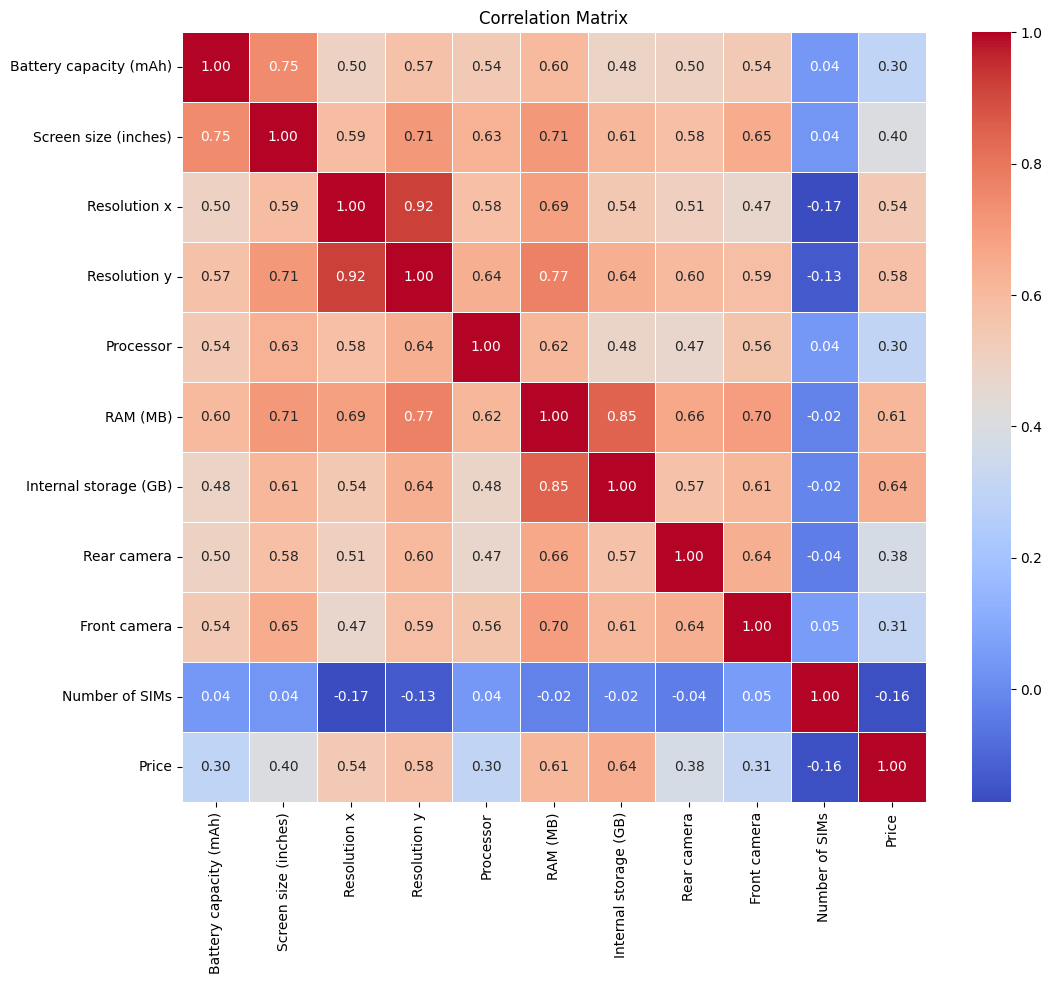

In [34]:
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Price analysis (analyse technique)